# 0. Introduction

Feature scaling is the process of normalising the range of features in a dataset. 

Real-world datasets often contain features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we have to perform feature scaling.

In science, we all know the importance of comparing apples to apples and yet many people, especially beginners, have a tendency to overlook feature scaling as part of the preprocessing steps for machine learning. This has proven to cause models to make inaccurate predictions. 

In this tutorial, we will discuss why feature scaling is important, the difference between normalisation and standardisation as well as how feature scaling affects model accuracy. More specifically, we will explore the applications of 3 different types of scalers in the Scikit-learn library: 

1. [MixMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
2. [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
3. [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

# 1. Import libraries

In [2]:
# Data wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# 2. Import dataset

In [3]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 3. Examine data

In [4]:
# Missing values and data type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Hooray, no missing values!

It also appears that all of our independent variables as well as the target variable are of the float64 data type. 

In [5]:
# Summary statistics

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


We can clearly observe that our features span across different range of values. This is largely attributed to the different units in which these features were measured and recorded.

This is where feature scaling can help us solve this issue.

# 4. Understand the effects of different scalers

In this section, we will learn the distinction between normalisation and standardisation. Subsequently, we will look at the effects of 3 different feature scaling techniques in Scikit-learn. 

# 4.1 Theory

Before we examine the effects of feature scaling, let us first go over some theories behind normalisation and standardisation.

## 4.2.1 Normalisation

Normalisation, also known as min-max scaling, is a scaling technique whereby the values in a column are shifted so that they are bounded between a fixed range of 0 and 1.

X_new = (X - X_min) / (X_max - X_min)

[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) is the Scikit-learn function for normalisation. 

## 4.2.2 Standardisation

On the other hand, standardisation or Z-score normalisation is another scaling technique whereby the values in a column are rescaled so that they demonstrate the properties of a standard Gaussian distribution, that is mean = 0 and variance = 1. 

X_new = (X - mean) / std

[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) is the Scikit-learn function for standardisation.

Unlike StandardScaler, [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) scales features using statistics that are robust to outliers. More specifically, this scaler removes the median and scales the data according to the quantile range or by default, the interquartile range, thus making it less susceptible to outliers. 

## 4.2.3 Normalisation vs standardisation 

The choice between normalisation or standardisation comes down to the application.

Standardisation is generally preferred over normalisation in most machine learning context as it is especially important in order to compare the similarities between features based on certain distance measures. This is most prominent in Principal Component Analysis (PCA) where we are interested in the components that maximise the variance.

Normalisation, on the other hand, also offers many practical applications particularly in computer vision and image processing where pixel intensities have to be normalised to fit within a the RGB colour range between 0 and 255. Furthermore, neural network algorithms typically require data to be normalised to a 0-1 scale before model training.  

At the end of the day, there is no definitive answer as to whether you should normalise or standardise your data. One can always apply both techniques and compare the model performance for the best results. 

# 4.2 Application 

Now that we have a theoretical understanding of feature scaling, let's see how they work in practice. 

In [6]:
# Get predictor and target variables
X = data.drop('quality', axis = 1)
Y = data['quality']

# X, Y shape
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (1599, 11)
Y shape:  (1599,)


In [7]:
# Instantiate MinMaxScaler, StandardScaler and RobustScaler

norm = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

In [8]:
# MinMaxScaler
normalised_features = norm.fit_transform(X)
normalised_df = pd.DataFrame(normalised_features, index = X.index, columns = X.columns)

# StandardScaler
standardised_features = standard.fit_transform(X)
standardised_df = pd.DataFrame(standardised_features, index = X.index, columns = X.columns)

# RobustScaler
robust_features = robust.fit_transform(X)
robust_df = pd.DataFrame(robust_features, index = X.index, columns = X.columns)

To demonstrate the effects of different scalers, I have chosen to examine the following features in our dataset before and after implementing feature scaling: 

- alcohol
- pH
- citric acid
- volatile acidity

Text(0, 0.5, '')

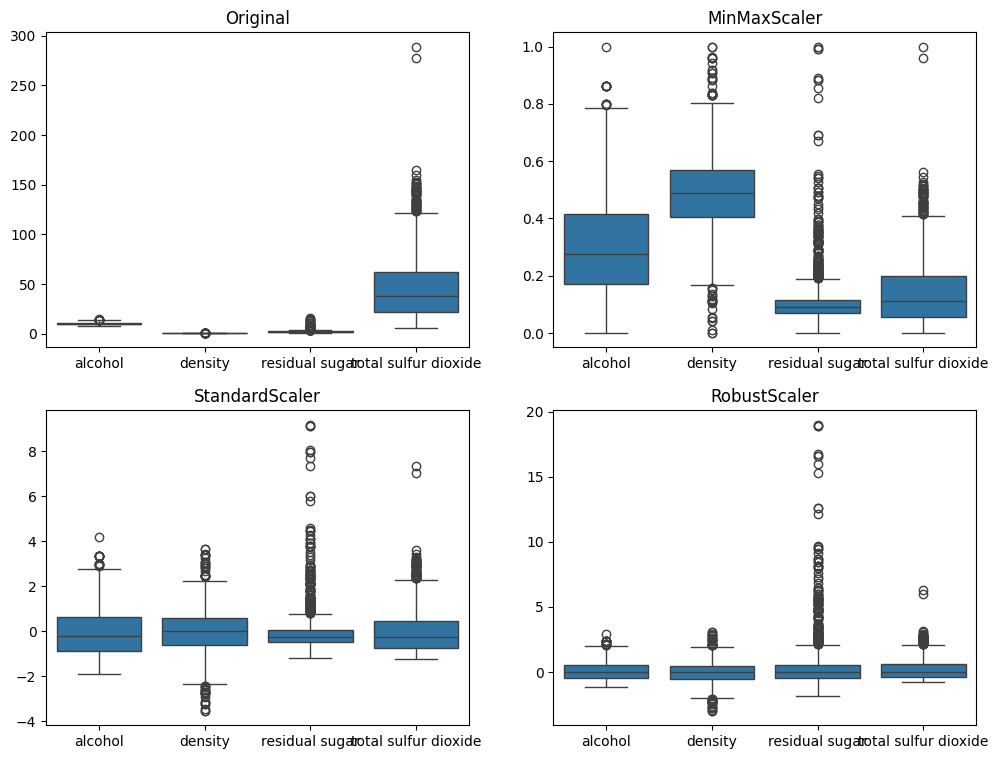

In [9]:
# Create subplots
fig, ax = plt.subplots(2, 2, figsize = (12, 9))

# Original
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(data[['alcohol', 'density', 'residual sugar', 'total sulfur dioxide']]), ax = ax[0, 0])
ax[0, 0].set_title('Original')
ax[0, 0].set_xlabel('')
ax[0, 0].set_ylabel('')

# MinMaxScaler
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(normalised_df[['alcohol', 'density', 'residual sugar', 'total sulfur dioxide']]), ax = ax[0, 1])
ax[0, 1].set_title('MinMaxScaler')
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('')

# StandardScaler
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(standardised_df[['alcohol', 'density', 'residual sugar', 'total sulfur dioxide']]), ax = ax[1, 0])
ax[1, 0].set_title('StandardScaler')
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel('')

# RobustScaler
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(robust_df[['alcohol', 'density', 'residual sugar', 'total sulfur dioxide']]), ax = ax[1, 1])
ax[1, 1].set_title('RobustScaler')
ax[1, 1].set_xlabel('')
ax[1, 1].set_ylabel('')

As we can see, our original features have wildly different ranges.

MinMaxScaler has rescaled our features so that their values are bounded between 0 and 1.

StandardScaler and RobustScaler, on the other hand, have rescaled our features so that they are distributed around the mean of 0. 

# 5. Compare model accuracy

I mentioned in the introduction of this tutorial that unscaled data can adversely impact a model's ability to make accurate predictions but so far, we have not discussed exactly how and why they do. In fact, feature scaling does not always improve a model's performance. Some models do not require feature scaling. 

In this section, we will explore the following classes of machine learning algorithms and discuss whether or not feature scaling impact their performance:

1. Gradient descent based algorithms
2. Distance-based algorithms
3. Tree-based algorithms 

# 5.1 Theory

Let's first go over some concepts behind those algorithms and think about how and why feature scaling might be important to each of them.

## 5.1.1 Gradient descent based algorithms

Gradient desent is an iterative optimisation algorithm that takes us to the minimum of a function. Machine learning algorithms like linear regression and logistic regression rely on gradient descent to minimise their loss functions or in other words, to reduce the error between the predicted values and the actual values. 

Having features with varying range of values will cause different step sizes for each feature. Therefore, to ensure that gradient descent converges more smoothly and quickly, we need to scale our features so that they have a similar scale.

## 5.1.2 Distance-based algorithms

The underlying algorithms to distance-based models make them the most susceptible to unscaled data. 

Algorithms like k-nearest neighbours, support vector machines and k-means clustering use the distance between data points to determine their similarity. Hence, features with a greater magnitude will be given a higher weightage by the model. This is not an ideal scenario as we do not want our algorithm to be heavily biased towards a single feature.

Evidently, it is important that we implement feature scaling to our data before fitting them to distance-based algorithms to ensure that all features contribute equally to the result. 

## 5.1.3 Tree-based algorithms 

Each node in a classification and regression trees (CART) model, otherwise known as decision trees represents a single feature in a dataset. The tree splits each node in such a way that it increases the homogeneity of that node. This split is not affected by the other features in the dataset. 

For that reason, we can conclude that decision trees are invariant to the scale of the features and therefore do not require feature scaling. This includes other ensemble models that are also tree-based such as random forest and gradient boosting. 

# 5.2 Proof of concept

Now that we understand the types of models that are sensitive and insensitive to feature scaling, let us now convince ourselves with a concrete example using the Boston Win pquality dataset. 

Here, I have chosen 2 distance-based algorithms (KNN and SVR) as well as 1 tree-based algorithm (decision trees regressor) to predict the Wine quality .

We should expect to see an improved model performance with feature scaling under KNN and SVR and a constant model performance under decision trees with and without feature scaling.

Feel free to experiment with other types of models like linear regression, random forest and gradient boosting!

In [10]:
# Instantiate models 
knn = KNeighborsRegressor()
svr = SVR()
tree = DecisionTreeRegressor(max_depth = 10, random_state = 42)

# Create a list which contains different scalers 
scalers = [norm, standard, robust]

In [11]:
# Train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (1119, 11)
Y_train shape:  (1119,)
X_test shape:  (480, 11)
Y_test shape:  (480,)


Before we get started, I think it is important to highlight the good practice of first fitting the scalers to the training set and then use that to transform the data in the test set. This is to prevent any data leakage and misleading accuracy scores.

Here, I will construct a pipeline which contains a scaler and a model to fit and transform the features and subsequently make predictions using each model. The accuracy of these predictions are then evaluated using root mean squared error. The smaller the error, the better the model performance. 

# 5.2.1 KNN

In [12]:
knn_rmse = []

# Without feature scaling
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
knn_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Apply different scaling techniques and make predictions using KNN 
for scaler in scalers:
    pipe = make_pipeline(scaler, knn)
    pipe.fit(X_train, Y_train)
    pred = pipe.predict(X_test)
    knn_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Show results     
knn_df = pd.DataFrame({'RMSE': knn_rmse}, index = ['Original', 'MinMaxScaler', 'StandardScaler', 'RobustScaler'])
knn_df

,RMSE
Original,0.727381
MinMaxScaler,0.676449
StandardScaler,0.672991
RobustScaler,0.674043


As expected, the errors are much smaller with feature scaling than without feature scaling. In other words, our model performed better using scaled features.

In this instance, KNN performed best under RobustScaler.

## 5.2.2 SVR

In [23]:
svr_rmse = []

# Without feature scaling
svr.fit(X_train, Y_train)
pred = svr.predict(X_test)
svr_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Apply different scaling techniques and make predictions using SVR
for scaler in scalers:
    pipe = make_pipeline(scaler, svr)
    pipe.fit(X_train, Y_train)
    pred = pipe.predict(X_test)
    svr_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Show results
svr_df = pd.DataFrame({'RMSE': svr_rmse}, index = ['Original', 'MinMaxScaler', 'StandardScaler', 'RobustScaler'])
svr_df

,RMSE
Original,0.726043
MinMaxScaler,0.624369
StandardScaler,0.612463
RobustScaler,0.624404


Similar to KNN, SVR also performed better with scaled features as seen by the lower errors.

In this instance, SVR performed best under StandardScaler.  

# 5.2.3 Decision tree

In [13]:
tree_rmse = []

# Without feature scaling
tree.fit(X_train, Y_train)
pred = tree.predict(X_test)
tree_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Apply different scaling techniques and make predictions using decision tree
for scaler in scalers:
    pipe = make_pipeline(scaler, tree)
    pipe.fit(X_train, Y_train)
    pred = pipe.predict(X_test)
    tree_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Show results 
tree_df = pd.DataFrame({'RMSE': tree_rmse}, index = ['Original', 'MinMaxScaler', 'StandardScaler', 'RobustScaler'])
tree_df

,RMSE
Original,0.776214
MinMaxScaler,0.772768
StandardScaler,0.770825
RobustScaler,0.772176


As expected, decision tree is insensitive to all feature scaling techniques as seen in the constant RMSE across scaled and unscaled features.